In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.metrics import r2_score

## Least Squares Regression

Linear regression analyzes the relationship between two variables, x and y. In general, the goal of linear regression is to find the line that best predicts y from x. This is achieved by finding the line that minimizes the sum of the squares of the vertical distances of the points from the line – the method is commonly called ‘least squares’. The Least squares method of line fitting assumes (i) that there is a linear relationship between y and x, defined by an equation y = a + bx (with a data set of n points); (ii) all errors are in the y direction; and (iii) errors are constant (absolute).

It is important to notice that the line of regression of x on y is not the same line as y on x, except in the highly unlikely case that the correlation coefficient $R^2$ = 1 exactly (Miller and Miller, 1993). Therefore depending on the type of data it may or may not be essential to consider the x on y fit, and errors that occur in the x-direction.

In this case, a table of experimental data (Table 1) has been given: concentration (x) and absorbance (y):

In [2]:
# Read data

conc_abs = pd.read_csv("Data/least_squares_data.csv")
print(conc_abs.head())

   Conc (x)  Abs (y)
0      0.75     8.00
1      0.95    10.85
2      1.70     9.38
3      2.10    12.44
4      4.00    11.64


### Least squares fit assuming only y has errors

In [3]:
# Define linear function

def func(x, a, b):
    y = a*x + b
    return y

# Fit line and print slope and intercept

alpha = optimize.curve_fit(func, 
                           xdata = conc_abs["Conc (x)"], 
                           ydata = conc_abs["Abs (y)"])[0]
print(alpha)

[0.80679922 9.66622456]


In [4]:
# Calculate correlation coefficient

r2_1 = r2_score(conc_abs["Abs (y)"], 
                alpha[0]*conc_abs["Conc (x)"] + alpha[1])
print(r2_1)

0.6776786301092697


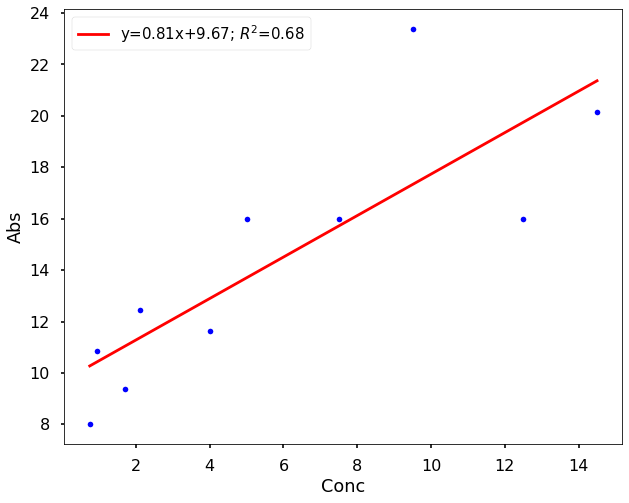

In [5]:
# Plot data

plt.style.use('seaborn-poster')
plt.figure(figsize = (10,8))
plt.plot(conc_abs["Conc (x)"], 
         conc_abs["Abs (y)"], 
         'b.')

# Plot linear regression function

plt.plot(conc_abs["Conc (x)"], 
         alpha[0]*conc_abs["Conc (x)"] + alpha[1], 
         'r', 
         label='y={:.2f}x+{:.2f}; $R^2$={:.2f}'.format(alpha[0], 
                                                       alpha[1], 
                                                       r2_1))
plt.xlabel('Conc')
plt.ylabel('Abs')
plt.legend(fontsize=15)
plt.show()

### Linear regression on non-linear data

In [6]:
# Read data

non_linear_conc_abs = pd.read_csv("Data/non_linear_data.csv")
print(non_linear_conc_abs)

   Conc (x)  Abs (y)
0         0    0.001
1         1    0.024
2         2    0.045
3         5    0.110
4        10    0.218
5        20    0.444
6        50    0.883
7       100    1.454


In [7]:
# Fit line and print slope and intercept

alpha2 = optimize.curve_fit(func, 
                            xdata = non_linear_conc_abs["Conc (x)"], 
                            ydata = non_linear_conc_abs["Abs (y)"])[0]
print(alpha2)

[0.01469664 0.05200386]


In [8]:
# Calculate correlation coefficient

r2_2 = r2_score(non_linear_conc_abs["Abs (y)"], 
                alpha2[0]*non_linear_conc_abs["Conc (x)"] + alpha2[1])
print(r2_2)

0.9842350543366568


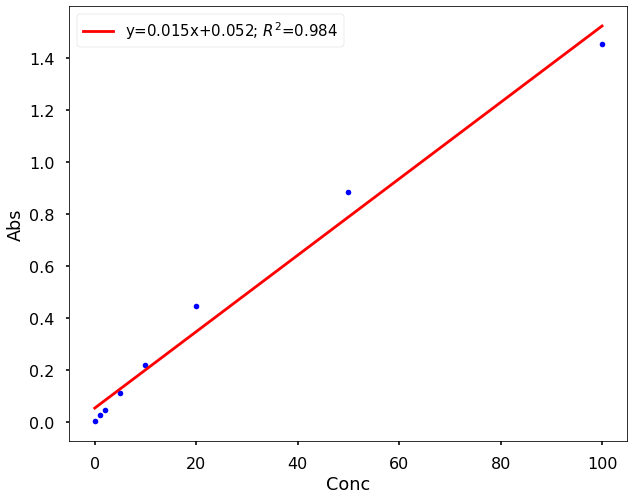

In [9]:
# Plot data

plt.figure(figsize = (10,8))
plt.plot(non_linear_conc_abs["Conc (x)"], 
         non_linear_conc_abs["Abs (y)"], 'b.')

# Plot linear regression function

plt.plot(non_linear_conc_abs["Conc (x)"], 
         alpha2[0]*non_linear_conc_abs["Conc (x)"] + alpha2[1], 
         'r', 
         label='y={:.3f}x+{:.3f}; $R^2$={:.3f}'.format(alpha2[0], 
                                                       alpha2[1], 
                                                       r2_2))
plt.xlabel('Conc')
plt.ylabel('Abs')
plt.legend(fontsize=15)
plt.show()

### Non-linear regression

#### 2nd order polynomial

In [10]:
# Define 2nd order polynomial function

def func2(x, a, b, c):
    y = a*(x**2) + b*x + c
    return y

# Fit line and print coefficients

alpha3 = optimize.curve_fit(func2, xdata = non_linear_conc_abs["Conc (x)"], 
                            ydata = non_linear_conc_abs["Abs (y)"])[0]
print(alpha3)

[-7.06177555e-05  2.14856000e-02  7.48206904e-03]


In [11]:
# Calculate correlation coefficient

r2_3 = r2_score(non_linear_conc_abs["Abs (y)"], 
                alpha3[0]*(non_linear_conc_abs["Conc (x)"])**2 \
                + (alpha3[1]*non_linear_conc_abs["Conc (x)"]) + alpha3[2])
print(r2_3)

0.9990213906549068


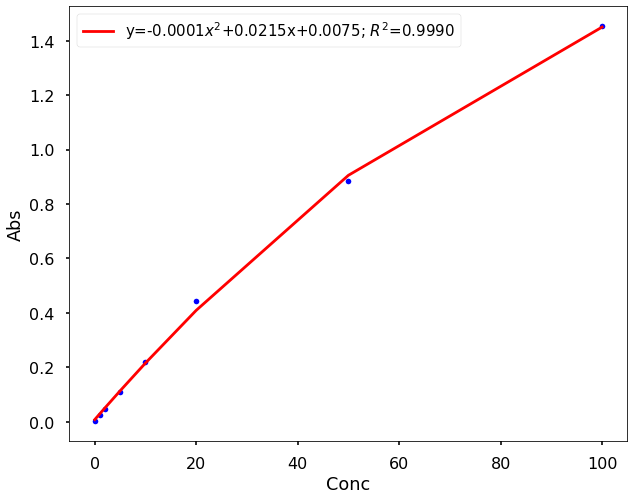

In [12]:
# Plot data

plt.figure(figsize = (10,8))
plt.plot(non_linear_conc_abs["Conc (x)"], 
         non_linear_conc_abs["Abs (y)"], 
         'b.')

# Plot 2nd order polynomial function

plt.plot(non_linear_conc_abs["Conc (x)"], 
         alpha3[0]*(non_linear_conc_abs["Conc (x)"])**2 \
         + (alpha3[1]*non_linear_conc_abs["Conc (x)"]) + alpha3[2], 
         'r', 
         label='y={:.4f}$x^2$+{:.4f}x+{:.4f}; $R^2$={:.4f}'.format(alpha3[0], 
                                                                   alpha3[1], 
                                                                   alpha3[2], 
                                                                   r2_3))
plt.xlabel('Conc')
plt.ylabel('Abs')
plt.legend(fontsize=15)
plt.show()

#### 3rd order polynomial

In [13]:
# Define 3rd order polynomial function

def func3(x, a, b, c, d):
    y = a*(x**3) + b*(x**2) + c*x + d
    return y

# Fit line and print coefficients

alpha4 = optimize.curve_fit(func3, 
                            xdata = non_linear_conc_abs["Conc (x)"], 
                            ydata = non_linear_conc_abs["Abs (y)"])[0]
print(alpha4)

[ 8.77532909e-07 -1.95882135e-04  2.53999677e-02 -4.88620244e-03]


In [14]:
# Calculate correlation coefficient

r2_4 = r2_score(non_linear_conc_abs["Abs (y)"], 
               (alpha4[0]*(non_linear_conc_abs["Conc (x)"])**3) \
                + (alpha4[1]*(non_linear_conc_abs["Conc (x)"])**2) \
                + (alpha4[2]*non_linear_conc_abs["Conc (x)"]) + alpha4[3])
print(r2_4)

0.9997833384757149


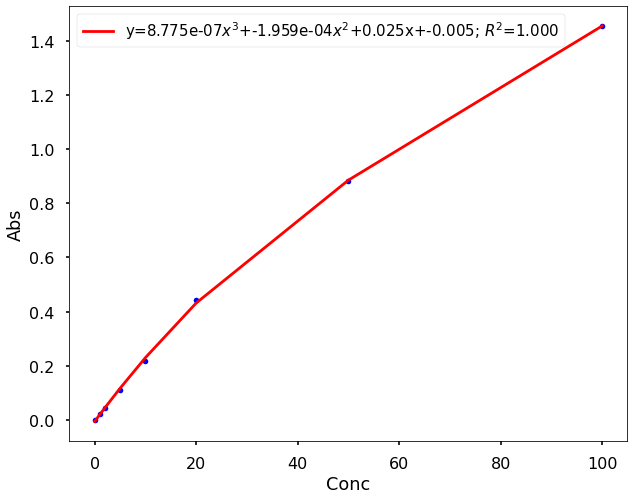

In [15]:
# Plot data

plt.figure(figsize = (10,8))
plt.plot(non_linear_conc_abs["Conc (x)"], 
         non_linear_conc_abs["Abs (y)"], 
         'b.')

# Plot 3rd order polynomial function

plt.plot(non_linear_conc_abs["Conc (x)"],
         (alpha4[0]*(non_linear_conc_abs["Conc (x)"])**3) + \
         (alpha4[1]*(non_linear_conc_abs["Conc (x)"])**2) + \
         (alpha4[2]*non_linear_conc_abs["Conc (x)"]) + alpha4[3], 
         'r', 
         label='y={:.3e}$x^3$+{:.3e}$x^2$+{:.3f}x+{:.3f}; $R^2$={:.3f}'.format(alpha4[0],
                                                                               alpha4[1],
                                                                               alpha4[2],
                                                                               alpha4[3],
                                                                               r2_4))
plt.xlabel('Conc')
plt.ylabel('Abs')
plt.legend(fontsize=15)
plt.show()

## References

Miller, J.C. and Miller, J.N. (1993). Statistics for Analytical Chemistry, 3rd ed., Ellis Horwood Ltd., England.